In [ ]:
import pandas as pd

# Function to load and preprocess the data
def load_data(file_path):
    sentences = []
    sentence = []

    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if line and not line.startswith("-DOCSTART-"):  # Skip empty lines and '-DOCSTART-'
                parts = line.split()
                if len(parts) == 4:  # Ensure there are exactly four columns
                    word, tag = parts[0], parts[3]  # Select the word and the tag
                    sentence.append((word, tag))
                else:
                    print(f"Skipping line due to unexpected format: {line}")
            else:
                if sentence:  # Add the sentence if it's not empty
                    sentences.append(sentence)
                sentence = []

    if sentence:  # Append the last sentence if needed
        sentences.append(sentence)

    return sentences

# Load train, test, and validation data
train_data = load_data('train.txt')
test_data = load_data('test.txt')
valid_data = load_data('valid.txt')

# Display the structure of a sample sentence
print("Sample sentence:", train_data[0])
print("Number of sentences in train data:", len(train_data))


# Load train, test, and validation data
train_data = load_data('train.txt')
test_data = load_data('test.txt')
valid_data = load_data('valid.txt')

# Display the structure of a sample sentence
print("Sample sentence:", train_data[0])
print("Number of sentences in train data:", len(train_data))

Sample sentence: [('EU', 'B-ORG'), ('rejects', 'O'), ('German', 'B-MISC'), ('call', 'O'), ('to', 'O'), ('boycott', 'O'), ('British', 'B-MISC'), ('lamb', 'O'), ('.', 'O')]
Number of sentences in train data: 14041
Sample sentence: [('EU', 'B-ORG'), ('rejects', 'O'), ('German', 'B-MISC'), ('call', 'O'), ('to', 'O'), ('boycott', 'O'), ('British', 'B-MISC'), ('lamb', 'O'), ('.', 'O')]
Number of sentences in train data: 14041


In [ ]:
# Check the structure of the file
with open('train.txt', 'r') as f:
    for _ in range(10):  # Print first 10 lines
        print(f.readline().strip())


-DOCSTART- -X- -X- O

EU NNP B-NP B-ORG
rejects VBZ B-VP O
German JJ B-NP B-MISC
call NN I-NP O
to TO B-VP O
boycott VB I-VP O
British JJ B-NP B-MISC
lamb NN I-NP O


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Prepare sentences and tags for tokenization
train_sentences = [[word for word, tag in sentence] for sentence in train_data]
train_tags = [[tag for word, tag in sentence] for sentence in train_data]

# Initialize tokenizers
word_tokenizer = Tokenizer(lower=True)
tag_tokenizer = Tokenizer(lower=False, filters='')

# Fit the tokenizers on the training data
word_tokenizer.fit_on_texts(train_sentences)
tag_tokenizer.fit_on_texts(train_tags)

# Convert words and tags to sequences of integers
train_sequences = word_tokenizer.texts_to_sequences(train_sentences)
train_tag_sequences = tag_tokenizer.texts_to_sequences(train_tags)

# Pad the sequences so that all sentences are of equal length
MAX_LENGTH = max(len(seq) for seq in train_sequences)
train_padded = pad_sequences(train_sequences, maxlen=MAX_LENGTH, padding='post')
train_tag_padded = pad_sequences(train_tag_sequences, maxlen=MAX_LENGTH, padding='post')

# Check results
print("Sample padded sentence:", train_padded[0])
print("Sample padded tags:", train_tag_padded[0])
print("Max sentence length:", MAX_LENGTH)
print("Vocabulary size:", len(word_tokenizer.word_index))
print("Number of unique tags:", len(tag_tokenizer.word_index))


Sample padded sentence: [  988 10950   204   628     6  3938   215  5773     2     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0]
Sample padded tags: [4 1 7 1 1 1 7 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Max sentence length: 113
Vocabulary 

In [ ]:
# Step 1: Download and unzip GloVe manually
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip -d .

# Step 2: Load the 100D GloVe embeddings
import numpy as np
import os

# Define the path to the GloVe file for 100-dimensional vectors
glove_path = 'glove.6B.100d.txt'

# Set embedding dimensions
EMBEDDING_DIM = 100
embedding_matrix = np.zeros((len(word_tokenizer.word_index) + 1, EMBEDDING_DIM))

# Load GloVe vectors into a dictionary
embeddings_index = {}
with open(glove_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coeffs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coeffs

# Create the embedding matrix
for word, i in word_tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

print("Embedding matrix shape:", embedding_matrix.shape)


--2024-10-29 15:03:55--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-10-29 15:03:56--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-10-29 15:03:56--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, TimeDistributed, Dropout, Bidirectional

# Model parameters
MAX_LENGTH = 113  # as found from max sentence length earlier
VOCAB_SIZE = len(word_tokenizer.word_index) + 1  # 21010
TAG_SIZE = len(tag_tokenizer.word_index) + 1  # 9 unique tags

# Build the model
model = Sequential()
model.add(Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM,
                    weights=[embedding_matrix], input_length=MAX_LENGTH, trainable=False))
model.add(Bidirectional(LSTM(units=50, return_sequences=True, recurrent_dropout=0.1)))
model.add(TimeDistributed(Dense(TAG_SIZE, activation="softmax")))

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │       2,101,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,101,000 (8.01 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,101,000 (8.01 MB)

In [ ]:
from collections import Counter

# Step 2: Create a list of words for the frequency counter
all_words = [word for sentence in train_data for word, tag in sentence]
word_freq = Counter(all_words)  # Count frequency of each word

# Create a mapping of words to indices
word2idx = {word: idx + 1 for idx, (word, _) in enumerate(word_freq.most_common())}  # Start from 1 to leave 0 for padding
word2idx['<PAD>'] = 0  # Padding token


In [ ]:
# Create a mapping of tags to indices
tag_freq = Counter(tag for sentence in train_data for _, tag in sentence)
tag2idx = {tag: idx for idx, (tag, _) in enumerate(tag_freq.most_common())}


In [ ]:
# Function to create padded sequences with error handling for unknown words
def create_padded_sequences(data, max_length, word2idx, tag2idx):
    padded_sentences = []
    padded_tags = []

    for sentence in data:
        words = [word for word, tag in sentence]
        tags = [tag for word, tag in sentence]

        # Convert words to indices, using a default value for unknown words
        seq = [word2idx.get(word, word2idx['<PAD>']) for word in words]
        tag_seq = [tag2idx.get(tag, 0) for tag in tags]  # Assuming 0 is used for padding in tags

        # Pad sequences
        padded_seq = pad_sequences([seq], maxlen=max_length, padding='post')[0]
        padded_tag_seq = pad_sequences([tag_seq], maxlen=max_length, padding='post')[0]

        padded_sentences.append(padded_seq)
        padded_tags.append(padded_tag_seq)

    return np.array(padded_sentences), np.array(padded_tags)


In [ ]:
all_words = [word.lower() for sentence in train_data for word, tag in sentence]


In [ ]:
import numpy as np
from collections import Counter
from keras.preprocessing.sequence import pad_sequences

# Function to create a mapping of words and tags to indices
def create_word_tag_indices(train_data):
    # Create a list of all words and tags
    all_words = [word for sentence in train_data for word, tag in sentence]
    all_tags = [tag for sentence in train_data for word, tag in sentence]

    # Create frequency distributions
    word_freq = Counter(all_words)
    tag_freq = Counter(all_tags)

    # Create mappings
    word2idx = {word: idx + 1 for idx, (word, _) in enumerate(word_freq.most_common())}  # Start from 1 to leave 0 for padding
    word2idx['<PAD>'] = 0  # Padding token

    tag2idx = {tag: idx for idx, tag in enumerate(tag_freq.keys())}

    return word2idx, tag2idx

# Function to create padded sequences with error handling for unknown words
def create_padded_sequences(data, max_length, word2idx, tag2idx):
    padded_sentences = []
    padded_tags = []

    for sentence in data:
        words = [word for word, tag in sentence]
        tags = [tag for word, tag in sentence]

        # Convert words to indices, using a default value for unknown words
        seq = [word2idx.get(word, word2idx['<PAD>']) for word in words]
        tag_seq = [tag2idx.get(tag, 0) for tag in tags]  # Assuming 0 is used for padding in tags

        # Pad sequences
        padded_seq = pad_sequences([seq], maxlen=max_length, padding='post')[0]
        padded_tag_seq = pad_sequences([tag_seq], maxlen=max_length, padding='post')[0]

        padded_sentences.append(padded_seq)
        padded_tags.append(padded_tag_seq)

    return np.array(padded_sentences), np.array(padded_tags)

# Load data
train_data = load_data('train.txt')  # Make sure this function is defined
valid_data = load_data('valid.txt')

# Create word and tag indices
word2idx, tag2idx = create_word_tag_indices(train_data)

# Define maximum length
max_length = 113  # Adjust based on your data analysis

# Create padded sequences for training and validation
padded_sentences, padded_tags = create_padded_sequences(train_data, max_length, word2idx, tag2idx)
padded_valid_sentences, padded_valid_tags = create_padded_sequences(valid_data, max_length, word2idx, tag2idx)

# Prepare training and validation data
X_train = np.array(padded_sentences)  # Your padded sentences
y_train = np.array(padded_tags)        # Your padded tags
X_val = np.array(padded_valid_sentences)  # Your validation padded sentences
y_val = np.array(padded_valid_tags)        # Your validation padded tags

# Check the shapes of the arrays
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)


X_train shape: (14041, 113)
y_train shape: (14041, 113)
X_val shape: (3250, 113)
y_val shape: (3250, 113)


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)  # Adjust epochs and batch size as needed

Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 190s 395ms/step - accuracy: 0.9543 - loss: 0.4777 - val_accuracy: 0.9753 - val_loss: 0.0935
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 172s 392ms/step - accuracy: 0.9783 - loss: 0.0820 - val_accuracy: 0.9782 - val_loss: 0.0802
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 172s 391ms/step - accuracy: 0.9815 - loss: 0.0673 - val_accuracy: 0.9801 - val_loss: 0.0707
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 202s 390ms/step - accuracy: 0.9830 - loss: 0.0590 - val_accuracy: 0.9813 - val_loss: 0.0648
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 172s 393ms/step - accuracy: 0.9846 - loss: 0.0528 - val_accuracy: 0.9826 - val_loss: 0.0598
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 202s 394ms/step - accuracy: 0.9859 - loss: 0.0474 - val_accuracy: 0.9834 - val_loss: 0.0559
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 202s 394ms/step - accuracy: 0.9873 - loss: 0.0431 - val_accuracy: 0.9849 - val_loss: 0.0527
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 212s 418ms/step - accuracy: 0.9881 -

In [ ]:
# Evaluate the model on validation data
loss, accuracy = model.evaluate(X_val, y_val, verbose=1)
print(f'Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}')

102/102 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - accuracy: 0.9876 - loss: 0.0424
Validation Loss: 0.0465, Validation Accuracy: 0.9864


In [ ]:
# Make predictions on validation set
predictions = model.predict(X_val)

# Convert predictions to tag indices
predicted_tags = np.argmax(predictions, axis=-1)

# Map predicted indices back to tags
predicted_tag_labels = [[list(tag2idx.keys())[list(tag2idx.values()).index(tag)] for tag in pred] for pred in predicted_tags]

# Print some sample predictions
for i in range(5):  # Adjust the range as needed
    print(f'Original: {valid_data[i]}')
    print(f'Predicted: {predicted_tag_labels[i]}')


102/102 ━━━━━━━━━━━━━━━━━━━━ 15s 122ms/step
Original: [('CRICKET', 'O'), ('-', 'O'), ('LEICESTERSHIRE', 'B-ORG'), ('TAKE', 'O'), ('OVER', 'O'), ('AT', 'O'), ('TOP', 'O'), ('AFTER', 'O'), ('INNINGS', 'O'), ('VICTORY', 'O'), ('.', 'O')]
Predicted: ['O', 'O', 'B-PER', 'O', 'O', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG', 'B-ORG

Unique tags in y_true: {0, 1, 2, 3, 4, 5, 6, 7, 8}
Unique tags in y_pred: {0, 1, 2, 3, 4, 5, 6, 7, 8}
Filtered labels for confusion matrix: [0, 1, 2, 3, 4, 5, 6, 7, 8]


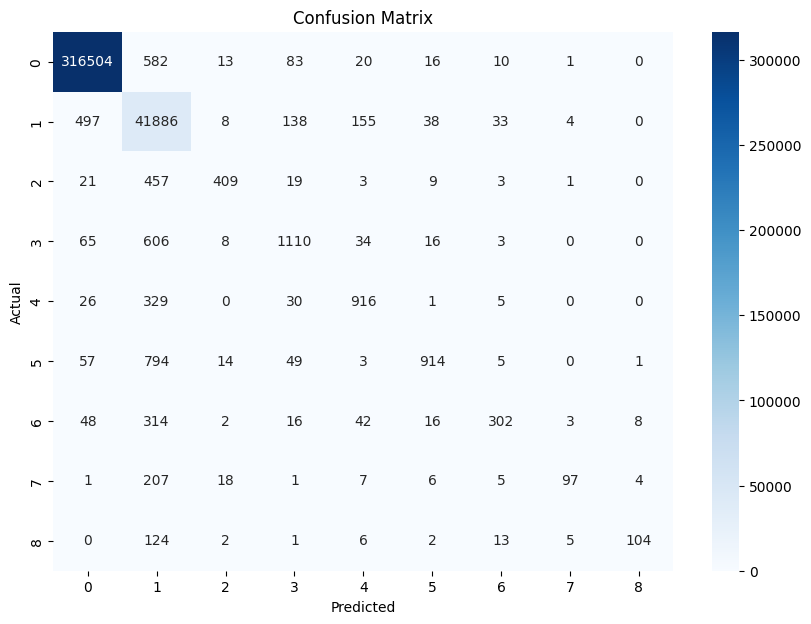

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    317229
           1       0.92      0.98      0.95     42759
           2       0.86      0.44      0.59       922
           3       0.77      0.60      0.67      1842
           4       0.77      0.70      0.73      1307
           5       0.90      0.50      0.64      1837
           6       0.80      0.40      0.53       751
           7       0.87      0.28      0.42       346
           8       0.89      0.40      0.56       257

    accuracy                           0.99    367250
   macro avg       0.86      0.59      0.68    367250
weighted avg       0.99      0.99      0.99    367250



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Flatten the lists for the confusion matrix
y_true = np.array([tag for sublist in y_val for tag in sublist])
y_pred = np.array([tag for sublist in predicted_tags for tag in sublist])

# Get unique tags from y_true and y_pred
unique_y_true = set(y_true)
unique_y_pred = set(y_pred)

# Print unique tags
print("Unique tags in y_true:", unique_y_true)
print("Unique tags in y_pred:", unique_y_pred)

# Assuming tag2idx is a mapping of labels to indices
# filtered_labels should be the same as the unique tags in y_true and y_pred
filtered_labels = list(set(range(len(tag2idx))) & unique_y_true & unique_y_pred)

# Debugging print
print("Filtered labels for confusion matrix:", filtered_labels)

# Check if filtered_labels is empty
if not filtered_labels:
    print("No valid labels for confusion matrix.")
else:
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=filtered_labels)

    # Visualize confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=filtered_labels, yticklabels=filtered_labels)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    # Classification report
    print(classification_report(y_true, y_pred, target_names=[str(label) for label in filtered_labels]))


In [ ]:
# Save the model
model.save('ner_model.h5')

# To load the model later
from keras.models import load_model
loaded_model = load_model('ner_model.h5')
